In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
rm_adjectives = []

f = open("adj_data/all_adj.txt", encoding="utf8")
for x in f:
    rm_adjective = x[:-1]
    rm_adjectives.append(rm_adjective)
    
    
germanet_flokkar = []

f = open("germanet_data/germanet_categories.txt", encoding="utf8")
for x in f:
    germanet_flokkur = x.split()
    germanet_flokkar.append(germanet_flokkur)
    
yfirflokkar = []
undirflokkar = []
leitarord = []

for i in germanet_flokkar:
    yfirflokkar.append(i[0])
    undirflokkar.append(i[1])
    leitarord1 = []
    leitarord1.append(i[2])
    leitarord1.append(i[3])
    leitarord.append(leitarord1)
    
yfirflokkar = list( dict.fromkeys(yfirflokkar) )
    
    
prenoms = []   
    
f = open("adj_data/prenoms_adj.txt", encoding="utf8")
for x in f:
    prenom = x.split()
    prenoms.append(prenom[:-1])
    
prenoms_likindi = []

f = open("adj_data/prenoms_cossims.txt", encoding="utf8")
for x in f:
    prenom_likur = x.split()
    prenoms_likindi.append(prenom_likur)
    
prenoms_yfirflokkar = []

f = open("adj_data/prenoms_supercategories.txt", encoding="utf8")
for x in f:
    prenom_yfirflokkur = x.split()
    prenoms_yfirflokkar.append(prenom_yfirflokkur)
    
prenoms_undirflokkar = []

f = open("adj_data/prenoms_subcategories.txt", encoding="utf8")
for x in f:
    prenom_undirflokkur = x.split()
    prenoms_undirflokkar.append(prenom_undirflokkur)

In [2]:
def tally_occurences(prenom:list, prevs):
    
    n = len(prenom)-1
    i = 0
    
    while n >= 1:
        
        m = 0
        word2 = prenom[n]
        cat2 = undirflokkar.index(word2)
        
        while m < n:
            
            word1 = prenom[m]
            cat1 = undirflokkar.index(word1)
            
            prevs[cat1,cat2] += 1
            
            m += 1
        
        n -= 1
    
    return prevs

In [3]:
# Lengsti strengur lýsingarorða á undan nafnorði

prenoms_len = []

for i in prenoms:
    prenoms_len.append(len(i))

print("Mesti fjöldi lýsingarorða á undan einu nafnorði er: ", max(prenoms_len))
print(" Sá strengur er: ", prenoms_undirflokkar[prenoms_len.index(max(prenoms_len))])

Mesti fjöldi lýsingarorða á undan einu nafnorði er:  18
 Sá strengur er:  ['uppruni', 'eðli', 'virkni', 'gáfur', 'venja', 'litur', 'birta', 'venja', 'vídd', 'útlit', 'erfiði', 'líkamsgerð', 'vissa', 'tilhneiging', 'örvun', 'verð', 'verð', 'verð']


In [6]:

prevs = np.zeros((len(undirflokkar), len(undirflokkar)))
for prenoms_undirflokkur in prenoms_undirflokkar:
    prevs = tally_occurences(prenoms_undirflokkur, prevs)
prevs_pd = pd.DataFrame(prevs, dtype=int, index=undirflokkar, columns=undirflokkar)
prevs = prevs_pd.to_csv()

with open('stats_data/prenom_undirflokkar_stats.csv', 'w', encoding='utf8') as f:
    f.write(prevs)


In [7]:
tidni_undan = []
tidni_eftir = []
studull = []

for i in prevs_pd:
    appears_before = 0
    appears_after = 0
    for j in prevs_pd:
        if i != j:
            appears_before = appears_before + prevs_pd.loc[i,j]
            appears_after = appears_after + prevs_pd.loc[j,i]
    tidni_undan.append(appears_before)
    tidni_eftir.append(appears_after)
    studull.append(appears_before/appears_after)
print(tidni_undan)
print(tidni_eftir)
print(studull)

[10351, 14660, 2399, 2879, 2737, 12453, 63846, 4751, 7102, 24311, 11543, 3560, 6705, 4707, 18277, 60225, 69621, 3537, 7736, 6239, 4968, 2192, 2209, 2132, 7809, 4957, 10594, 1887, 5480, 977, 4309, 17606, 12015, 3523, 2359, 34432, 3768, 9026, 32716, 21780, 9681, 102420, 8360, 14562, 8780, 12453, 10588, 9271, 12101, 8390, 9089, 2077, 24608, 74433, 20890, 7675, 39587, 6642, 18132, 6092, 18071, 3607, 9533, 7417, 8691, 9646, 6989, 9213, 6275, 5566, 2490]
[9204, 23266, 1864, 3255, 3392, 11844, 38319, 6698, 5541, 27887, 11392, 6602, 6378, 5929, 9319, 30639, 49740, 4310, 11335, 4569, 5391, 4383, 2151, 2151, 5886, 4979, 13971, 3755, 6093, 934, 4490, 16190, 11451, 3039, 3220, 34916, 2780, 7366, 41076, 23689, 12529, 92758, 15202, 19707, 11159, 9623, 12428, 8100, 19435, 13443, 88686, 2856, 7247, 15024, 29061, 8865, 47516, 2926, 17467, 9007, 12798, 3577, 12683, 17727, 4508, 6484, 6201, 10482, 20479, 4671, 3664]
[1.1246197305519339, 0.6301040144416745, 1.2870171673819744, 0.8844854070660523, 0.806898

In [8]:
tidni = [0] * len(undirflokkar)

for prenom in prenoms_undirflokkar:
    for i in prenom:
        tidni[undirflokkar.index(i)] = tidni[undirflokkar.index(i)] +1

In [9]:
# Tíðni undirflokka

undirflokkar_tidni = []

for i in range(len(undirflokkar)):
    temp = []
    temp.append(undirflokkar[i])
    temp.append(tidni[i])
    undirflokkar_tidni.append(temp)

def sortFunc(e):
    return e[1]

sorted_undirflokkar_tidni = undirflokkar_tidni.copy()
sorted_undirflokkar_tidni.sort(key=sortFunc)

print("Sjaldgæfasti lýsingarorðaflokkurinn er", sorted_undirflokkar_tidni[0][0])
print("Orð eru flokkuð í hann", sorted_undirflokkar_tidni[0][1], "sinnum")
print("")
print("Algengasti lýsingarorðaflokkurinn er", sorted_undirflokkar_tidni[len(sorted_undirflokkar_tidni)-1][0])
print("Orð eru flokkuð í hann", sorted_undirflokkar_tidni[len(sorted_undirflokkar_tidni)-1][1], "sinnum")

Sjaldgæfasti lýsingarorðaflokkurinn er veður
Orð eru flokkuð í hann 1851 sinnum

Algengasti lýsingarorðaflokkurinn er hegðun
Orð eru flokkuð í hann 204798 sinnum


In [10]:
# Stuðlar undirflokka
# Hver undirflokkur hefur sinn eigin stuðul þar sem stuðullinn er fjöldi orða sem það birtist á undan deilt með fjölda orða sem það birtist á eftir
# Flokkur með hærri stuðul hljómar betur á undan flokki með lægri stuðul

undirflokkar_studull = []

for i in range(len(undirflokkar)):
    temp = []
    temp.append(undirflokkar[i])
    temp.append(studull[i])
    undirflokkar_studull.append(temp)

def sortFunc(e):
    return e[1]
    
sorted_undirflokkar_studull = undirflokkar_studull.copy()
sorted_undirflokkar_studull.sort(reverse=True, key=sortFunc)

In [11]:
# Ólíklegasta lýsingarorðið

prenom_undirflokkur_likindi = []

for i in range(len(prenoms)):
    for j in range(len(prenoms[i])):
        temp = []
        temp.append(prenoms[i][j])
        temp.append(prenoms_undirflokkar[i][j])
        temp.append(prenoms_likindi[i][j])
        prenom_undirflokkur_likindi.append(temp)
        
def sortFunc(e):
    return e[2]

sorted_prenom_undirflokkur_likindi = prenom_undirflokkur_likindi.copy()
sorted_prenom_undirflokkur_likindi.sort(reverse=True, key=sortFunc)

temp = []
temp.append(sorted_prenom_undirflokkur_likindi[0])
for elem in sorted_prenom_undirflokkur_likindi:
    if elem[0] != temp[len(temp)-1][0]:
        temp.append(elem)
sorted_prenom_undirflokkur_likindi = temp

temp = []
for i in sorted_prenom_undirflokkur_likindi:
    if i not in temp:
            temp.append(i) 
        
sorted_prenom_undirflokkur_likindi = temp.copy()

with open('adj_data/sorted_prenom_undirflokkur_likindi.txt', 'w', encoding='utf8') as f:
    for word in sorted_prenom_undirflokkur_likindi:
        for element in word:
            f.write("%s\t" % element)
        f.write("\n")
        
n = len(sorted_prenom_undirflokkur_likindi) - 1

print("Lýsingarorðið með lægstu líkurnar er: ", sorted_prenom_undirflokkur_likindi[n][0])
print("Áætlaður undirflokkur sem orðið telst vera hluti af er: ", sorted_prenom_undirflokkur_likindi[n][1])
print("Það hefur líkurnar: {:.3%}".format(float(sorted_prenom_undirflokkur_likindi[n][2])))

Lýsingarorðið með lægstu líkurnar er:  5m/s
Áætlaður undirflokkur sem orðið telst vera hluti af er:  tilvera
Það hefur líkurnar: 23.589%


In [12]:
a = 0
b = 0

for prenom in prenoms_likindi:
    for i in prenom:
        a = a + float(i)
        b = b + 1
        
c = a / b
print(a,b,c)

1599112.2350446465 2026373 0.7891499911638413


In [13]:
moguleg_leitarord = []

for prenom in sorted_prenom_undirflokkur_likindi:
    if float(prenom[2]) >= 0.9 and float(prenom[2]) < 1:
        moguleg_leitarord.append(prenom)
        
temp = []
temp2 = []

for i in moguleg_leitarord:
    for j in leitarord:
        if i[0] not in j:
            temp.append(i)
        
for i in temp:
    if i not in temp2:
        temp2.append(i)
        
moguleg_leitarord = temp2.copy()
              
with open('moguleg_leitarord.txt', 'w', encoding='utf8') as f:
    for word in moguleg_leitarord:
        for element in word:
            f.write("%s\t" % element)
        f.write("\n")

In [14]:
flokkud_lo = []

for i in germanet_flokkar:
    flokkud_lo.append([i[1]])
    
for i in sorted_prenom_undirflokkur_likindi:
    for j in flokkud_lo:
        if i[1] == j[0] and i[0] not in j:
            j.append(i[0])
            
with open('flokkud_lo.txt', 'w', encoding='utf8') as f:
    for word in flokkud_lo:
        for element in word:
            f.write("%s\t" % element)
        f.write("\n")
        f.write("\n")

In [15]:
undirflokkar_fjoldi = undirflokkar.copy()

for i in range(len(undirflokkar_fjoldi)):
    undirflokkar_fjoldi[i] = [undirflokkar[i], 0]
    

for i in prenoms_undirflokkar:
    for j in i:
        undirflokkar_fjoldi[undirflokkar.index(j)][1] += 1

In [16]:
undirflokkar_studull_fjoldi = []

for i in range(len(undirflokkar)):
    temp = []
    temp.append(undirflokkar[i])
    temp.append(undirflokkar_studull[i][1])
    temp.append(undirflokkar_fjoldi[i][1])
    undirflokkar_studull_fjoldi.append(temp)
    
def sortFunc(e):
    return e[1]
    
sorted_undirflokkar_studull_fjoldi = undirflokkar_studull_fjoldi.copy()
sorted_undirflokkar_studull_fjoldi.sort(reverse=True, key=sortFunc)
    
with open('stats_data/sorted_undirflokkar_studull_fjoldi.txt', 'w', encoding='utf8') as f:
    for word in sorted_undirflokkar_studull_fjoldi:
        for element in word:
            f.write("%s\t" % element)
        f.write("\n")

In [17]:
sorted_undirflokkar = []

for i in sorted_undirflokkar_studull_fjoldi:
    sorted_undirflokkar.append(i[0])

In [18]:
prenomnoms = []   
    
f = open("adj_data/prenoms_adj.txt", encoding="utf8")
for x in f:
    prenomnom = x.split()
    prenomnoms.append(prenomnom)

In [19]:
prenom_i_rettri_rod = []
prenom_i_rangri_rod = []
undirflokkar_i_rangri_rod = []

for i in range(len(prenoms_undirflokkar)):
    prenom = prenoms_undirflokkar[i]
    a = 0
    rong_rod = False
    for j in prenom:
        b = sorted_undirflokkar.index(j)
        if b < a:
            rong_rod = True
        a = b
    if rong_rod:
        prenom_i_rangri_rod.append(prenomnoms[i])
        undirflokkar_i_rangri_rod.append(prenoms_undirflokkar[i])
    else:
        prenom_i_rettri_rod.append(prenomnoms[i])

In [20]:
print(len(prenom_i_rettri_rod))
print(len(prenom_i_rangri_rod))
print(len(prenom_i_rettri_rod) / (len(prenom_i_rettri_rod) + len(prenom_i_rangri_rod)))
print(len(prenoms))

655954
315606
0.6751554201490386
971560


<function matplotlib.pyplot.show(close=None, block=None)>

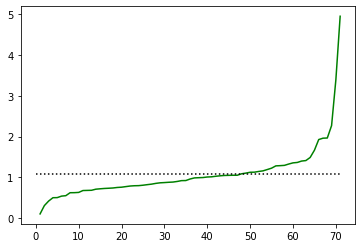

In [21]:
x = range(1,72)
y = []
yy = []
for i in sorted_undirflokkar_studull:
    y.append(i[1])
for i in reversed(y):
    yy.append(i)
plt.plot(x,yy, 'g')
plt.plot([0,71], [1.0761554796405601, 1.0761554796405601], 'k:')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

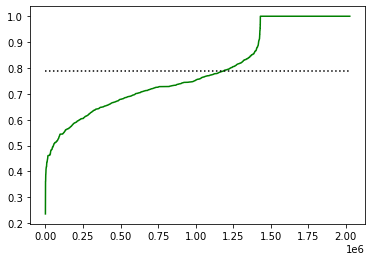

In [22]:
likindi = []

for i in prenoms_likindi:
    for j in i:
        likindi.append(float(j))

likindi.sort()

plt.plot(range(1, len(likindi)+1), likindi, 'g')
plt.plot([0, len(likindi)+1], [0.7891499911638413, 0.7891499911638413], 'k:')
plt.show

2026373 28540.464788732395


<function matplotlib.pyplot.show(close=None, block=None)>

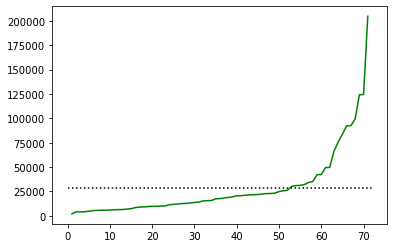

In [23]:
fjoldi = []
a = 0

for i in sorted_undirflokkar_studull_fjoldi:
    fjoldi.append(i[2])
    a = a + i[2]
    
fjoldi.sort()

print(a, a/71)

plt.plot(range(1, len(fjoldi)+1), fjoldi, 'g')
plt.plot([0, len(fjoldi)+1], [28540.464788732395, 28540.464788732395], 'k:')
plt.show

In [24]:
for i in range(len(sorted_undirflokkar_studull)):
    print(str(i+1) + '. &', sorted_undirflokkar_studull[i][0], '&', '{:5.3f}'.format(sorted_undirflokkar_studull[i][1]), '&', sorted_undirflokkar_studull_fjoldi[i][2], '& ')

1. & fjöldi & 4.954 & 83828 & 
2. & tala & 3.396 & 34152 & 
3. & vissa & 2.270 & 9017 & 
4. & aldur & 1.966 & 92295 & 
5. & hraði & 1.961 & 26118 & 
6. & tenging & 1.928 & 12682 & 
7. & vídd & 1.666 & 99178 & 
8. & samræmi & 1.488 & 15599 & 
9. & erfiði & 1.412 & 30190 & 
10. & venja & 1.400 & 124068 & 
11. & ástand & 1.366 & 9863 & 
12. & líkamsástand & 1.355 & 6309 & 
13. & mengun & 1.327 & 12451 & 
14. & samúð & 1.294 & 21520 & 
15. & hljóð & 1.287 & 3953 & 
16. & staðsetning & 1.282 & 12032 & 
17. & tilfinning & 1.225 & 15482 & 
18. & tilvísun & 1.192 & 9429 & 
19. & líkamstilfinning & 1.159 & 6297 & 
20. & félagsstaða & 1.145 & 17367 & 
21. & nákvæmni & 1.127 & 12994 & 
22. & birta & 1.125 & 17559 & 
23. & hegðun & 1.104 & 204798 & 
24. & líkamsgerð & 1.087 & 30896 & 
25. & áferð & 1.051 & 23140 & 
26. & tilvera & 1.051 & 13693 & 
27. & heilsa & 1.049 & 20558 & 
28. & veður & 1.046 & 1851 & 
29. & nauðsyn & 1.038 & 35124 & 
30. & þroski & 1.027 & 3912 & 
31. & rúmdreifing & 1.013 

In [25]:
a = 0

for i in sorted_undirflokkar_studull:
    a = a + i[1]
    
print(a, a/len(sorted_undirflokkar_studull))

76.40703905447977 1.0761554796405601


In [89]:
random.choices(prenom_i_rettri_rod, k=4)

[['nýr', 'lítill', 'timburhús'],
 ['kúrdískur', 'vinstrisinnaður', 'vígamaður'],
 ['vinstri', 'gænn', 'ályktun'],
 ['sterkur', 'hugrakkur', 'frænka']]

In [83]:
example_rangt

[['evrópskur', 'listrænn', 'kvikmynd'],
 ['fínn', 'fyrstur', 'verk'],
 ['magnaður', 'feitur', 'ilmur'],
 ['grillaður', 'brenndur', 'matur'],
 ['samsettur', 'áhugaverður', 'maður']]

In [84]:
example_rett

[['fyrstur', 'fyndinn', 'myndband'],
 ['brosmildur', 'hlýr', 'góður', 'kona'],
 ['nýr', 'íslenskur', 'efnahagskerfi'],
 ['margvíslegur', 'óbeinn', 'afleiðing'],
 ['lítill', 'náttúrulegur', 'auðlind']]